In [3]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# No truncation of column content
pd.set_option('display.max_colwidth', None)  

import matplotlib.pyplot as plt
import seaborn as sns

## EDA

### Загружаем сырые данные

In [4]:
# List files available
print(os.listdir("./input/"))

['.~lock.HomeCredit_columns_description.ods#', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'HomeCredit_columns_description.ods', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [5]:
# 1.1 Training data
app_train = pd.read_csv('./input/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.sample(3)

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
11333,113200,0,Revolving loans,F,N,Y,1,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0
125855,245943,0,Cash loans,M,N,Y,1,148500.0,135000.0,9954.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
264160,405896,0,Cash loans,F,N,Y,0,112500.0,354519.0,25339.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0


In [6]:
# 1.2 Test data
app_test = pd.read_csv('./input/application_test.csv')
print('Test data shape: ', app_test.shape)
app_test.sample(3)

Test data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
32837,339256,Cash loans,F,Y,Y,2,180000.0,599778.0,26550.0,477000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
7799,157265,Cash loans,F,N,Y,0,360000.0,1073835.0,38700.0,927000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
22433,263056,Cash loans,M,N,Y,0,171000.0,490500.0,25173.0,490500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
targets = app_train['TARGET'].value_counts()
print(f'количество кредитов без просрочек в {targets[0]/targets[1]: .0f} раз превышает количество кредитов с просрочками, т.е. тренировочная выборка не сбалансирована')

количество кредитов без просрочек в  11 раз превышает количество кредитов с просрочками, т.е. тренировочная выборка не сбалансирована


In [8]:
# 2 bureau data
bureau_df = pd.read_csv('./input/bureau.csv')
print('Test data shape: ', bureau_df.shape)
bureau_df.sample(3)

Test data shape:  (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
506176,413053,6534656,Closed,currency 1,-1840,0,-1596.0,-1577.0,NaN,0,65893.5,0.0,0.0,0.0,Consumer credit,-798,NaN
139139,114002,6555976,Closed,currency 1,-2469,0,-1707.0,-1707.0,NaN,0,315000.0,0.0,0.0,0.0,Consumer credit,-1705,NaN
1598979,129786,5333489,Closed,currency 1,-809,0,-444.0,-536.0,NaN,0,135000.0,0.0,0.0,0.0,Consumer credit,-492,NaN


In [9]:
# 3 bureau_balance data
bureau_balance_df = pd.read_csv('./input/bureau_balance.csv')
print('Test data shape: ', bureau_balance_df.shape)
bureau_balance_df.sample(1)

Test data shape:  (27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
14356559,6800254,-9,C


In [10]:
# 4 POS_CASH_balance data
POS_CASH_balance_df = pd.read_csv('./input/POS_CASH_balance.csv')
print('Test data shape: ', POS_CASH_balance_df.shape)
POS_CASH_balance_df.sample(1)

Test data shape:  (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2955088,1381777,323885,-12,6.0,6.0,Active,0,0


In [11]:
# 5 credit_card_balance data
credit_card_balance_df = pd.read_csv('./input/credit_card_balance.csv')
print('credit_card_balance data shape: ', credit_card_balance_df.shape)
credit_card_balance_df.sample(1)

credit_card_balance data shape:  (3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3638605,1871487,208513,-54,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,31.0,Active,0,0


In [12]:
# 6 previous_application data
previous_application_df = pd.read_csv('./input/previous_application.csv')
print('previous_application data shape: ', previous_application_df.shape)
previous_application_df.sample(1)

previous_application data shape:  (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
102081,1915294,304853,Revolving loans,38250.0,765000.0,765000.0,NaN,765000.0,TUESDAY,11,...,XNA,0.0,XNA,Card X-Sell,-358.0,-314.0,365243.0,365243.0,365243.0,0.0


In [13]:
# 7 installments_payments data
installments_payments_df = pd.read_csv('./input/installments_payments.csv')
print('installments_payments shape: ', installments_payments_df.shape)
installments_payments_df.sample(1)

installments_payments shape:  (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
6753880,2214105,244504,2.0,2,-173.0,-193.0,90649.26,90649.26


In [14]:
# 8 метаданные
columns_description_df = pd.read_csv('./input/HomeCredit_columns_description.csv',index_col=0, encoding='latin1')
print('installments_payments shape: ', columns_description_df.shape)
columns_description_df.sample(1)

installments_payments shape:  (219, 4)


,Table,Row,Description,Special
211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current application when was the last due date of the previous application,time only relative to the application


### Функции

In [15]:
# функция саммаризирует датасет (количество пропущенных и уникательных значений, тип данных)
def summarize_df(df):
    df_info = pd.DataFrame({
    "DataType": df.dtypes,
    "MissingValues": df.isnull().sum(),
    "UniqueValues": df.nunique()
    }).sort_values(by="MissingValues", ascending=False)
    df_info['MissingValuesRatio'] = round(df_info['MissingValues'] / len(df),2)
         
    return df_info

In [16]:
# типизация колонок датафрейма
def columns_types_assumption(df):
    binary_cols = [cname for cname in df.columns if
                    df[cname].nunique() <= 2 and 
                    df[cname].dtype in ['int64', 'object','bool']]

    categorical_cols = [cname for cname in df.columns if
                    df[cname].nunique() < 10 and df[cname].nunique() > 2 and
                    df[cname].dtype in ['object']]

    numerical_cols = [cname for cname in df.columns if 
                df[cname].dtype in ['int64', 'float64'] and df[cname].nunique() > 2]

    return binary_cols, categorical_cols, numerical_cols

In [17]:
# функция исключает аномалии методом 3-сигм
def cap_outliers_3sigma(df, columns):
    """
    Caps values in specified columns at the 3-sigma threshold and calculates the percentage of outliers.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        columns (list): List of column names to cap.
    
    Returns:
        pd.DataFrame: DataFrame with capped values.
        pd.Series: Percentage of outliers for each column.
    """
    df_capped = df.copy()
    outlier_percentages = {}

    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std

        # Calculate outlier percentage
        num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_percentages[col] = (num_outliers / len(df)) * 100

        # Apply capping
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df_capped, pd.Series(outlier_percentages, name="Outlier Percentage")

## Предобработка

### Обработка основного датасета applications

In [18]:
if 'app_train' in locals():
    del(app_train)

if 'app_test' in locals():
    del(app_test)

app_train_orig = pd.read_csv('./input/application_train.csv')
# app_test = pd.read_csv('./input/application_test.csv')

# app_train['dataset'] = 'train'
# app_test['dataset'] = 'test'

In [19]:
app_train_orig.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


проанализируем данные по их типам (категориальные, булевы, численные)

In [20]:
app_train_orig_info = summarize_df(app_train_orig)
binary_cols_proposal, categorical_cols_proposal, numerical_cols_proposal = columns_types_assumption(app_train_orig)
app_train_orig_info.head(1)

# добавляем описание каждого параметра для удобства
columns_metadata = columns_description_df.loc[columns_description_df['Table']=='application_{train|test}.csv']
app_train_orig_info = app_train_orig_info.join(columns_metadata.set_index('Row')[['Description']], how='left')

In [21]:
app_train_orig_info.sort_values(by='MissingValues', ascending=False).head(1)

,DataType,MissingValues,UniqueValues,MissingValuesRatio,Description
COMMONAREA_MEDI,float64,214865,3202,0.7,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"


In [22]:
app_train_orig_info.pivot_table(index='DataType', aggfunc='size')

DataType
int64      41
float64    65
object     16
dtype: int64

In [23]:
print(f'binary_cols_proposal: {len(binary_cols_proposal)}')
print(f'categorical_cols_proposal: {len(categorical_cols_proposal)}')
print(f'numerical_cols_proposal: {len(numerical_cols_proposal)}')

binary_cols_proposal: 37
categorical_cols_proposal: 10
numerical_cols_proposal: 73


#### категориальные переменные

In [24]:
unique_values = {col: app_train_orig[col].unique().tolist() for col in app_train_orig[categorical_cols_proposal]}
# Convert dictionary to DataFrame
unique_df = pd.DataFrame(list(unique_values.items()), columns=['Column', 'Unique_Values'])
unique_df.merge(app_train_orig_info[['DataType','Description']], left_on='Column',right_index=True)

,Column,Unique_Values,DataType,Description
0,CODE_GENDER,"[M, F, XNA]",object,Gender of the client
1,NAME_TYPE_SUITE,"[Unaccompanied, Family, Spouse, partner, Children, Other_A, nan, Other_B, Group of people]",object,Who was accompanying client when he was applying for the loan
2,NAME_INCOME_TYPE,"[Working, State servant, Commercial associate, Pensioner, Unemployed, Student, Businessman, Maternity leave]",object,"Clients income type (businessman, working, maternity leave, )"
3,NAME_EDUCATION_TYPE,"[Secondary / secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree]",object,Level of highest education the client achieved
4,NAME_FAMILY_STATUS,"[Single / not married, Married, Civil marriage, Widow, Separated, Unknown]",object,Family status of the client
5,NAME_HOUSING_TYPE,"[House / apartment, Rented apartment, With parents, Municipal apartment, Office apartment, Co-op apartment]",object,"What is the housing situation of the client (renting, living with parents, ...)"
6,WEEKDAY_APPR_PROCESS_START,"[WEDNESDAY, MONDAY, THURSDAY, SUNDAY, SATURDAY, FRIDAY, TUESDAY]",object,On which day of the week did the client apply for the loan
7,FONDKAPREMONT_MODE,"[reg oper account, nan, org spec account, reg oper spec account, not specified]",object,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
8,HOUSETYPE_MODE,"[block of flats, nan, terraced house, specific housing]",object,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
9,WALLSMATERIAL_MODE,"[Stone, brick, Block, nan, Panel, Mixed, Wooden, Others, Monolithic]",object,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"


In [25]:
app_train_orig.pivot_table(index='CODE_GENDER', aggfunc='size')

CODE_GENDER
F      202448
M      105059
XNA         4
dtype: int64

CODE_GENDER на самом деле бинарная переменная, за редким исключением. Можем смело переопределить XNA как женский гендер (в датасете женщин-заемщиков в 2 раза больше, чем мужчин)

In [26]:
app_train_orig['CODE_GENDER'] = app_train_orig['CODE_GENDER'].map({'F': 1, 'M': 0, 'XNA': 1, 1: 1, 0: 0})

if 'CODE_GENDER' not in binary_cols_proposal:
    binary_cols_proposal.append('CODE_GENDER')

if 'CODE_GENDER' in categorical_cols_proposal:
    categorical_cols_proposal.remove('CODE_GENDER')  

In [27]:
app_train_orig['CODE_GENDER'].unique()

array([0, 1], dtype=int64)

#### Анализ бинарных признаков

In [28]:
# выводим только флаги
unique_values = {col: app_train_orig[col].unique().tolist() for col in app_train_orig[binary_cols_proposal]}
# Convert dictionary to DataFrame
unique_df = pd.DataFrame(list(unique_values.items()), columns=['Column', 'Unique_Values'])

unique_df[unique_df['Column'].str.contains('FLAG')].merge(app_train_orig_info[['DataType','Description']], left_on='Column',right_index=True)

,Column,Unique_Values,DataType,Description
2,FLAG_OWN_CAR,"[N, Y]",object,Flag if the client owns a car
3,FLAG_OWN_REALTY,"[Y, N]",object,Flag if client owns a house or flat
4,FLAG_MOBIL,"[1, 0]",int64,"Did client provide mobile phone (1=YES, 0=NO)"
5,FLAG_EMP_PHONE,"[1, 0]",int64,"Did client provide work phone (1=YES, 0=NO)"
6,FLAG_WORK_PHONE,"[0, 1]",int64,"Did client provide home phone (1=YES, 0=NO)"
7,FLAG_CONT_MOBILE,"[1, 0]",int64,"Was mobile phone reachable (1=YES, 0=NO)"
8,FLAG_PHONE,"[1, 0]",int64,"Did client provide home phone (1=YES, 0=NO)"
9,FLAG_EMAIL,"[0, 1]",int64,"Did client provide email (1=YES, 0=NO)"
17,FLAG_DOCUMENT_2,"[0, 1]",int64,Did client provide document 2
18,FLAG_DOCUMENT_3,"[1, 0]",int64,Did client provide document 3


все поля с именем FLAG имеют два значения. Y/N ниже конвертируем в 1/0

In [29]:
# выводим остальные (не флаги)
unique_df[~unique_df['Column'].str.contains('FLAG')].merge(app_train_orig_info[['DataType','Description']], left_on='Column',right_index=True)

,Column,Unique_Values,DataType,Description
0,TARGET,"[1, 0]",int64,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
1,NAME_CONTRACT_TYPE,"[Cash loans, Revolving loans]",object,Identification if loan is cash or revolving
10,REG_REGION_NOT_LIVE_REGION,"[0, 1]",int64,"Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)"
11,REG_REGION_NOT_WORK_REGION,"[0, 1]",int64,"Flag if client's permanent address does not match work address (1=different, 0=same, at region level)"
12,LIVE_REGION_NOT_WORK_REGION,"[0, 1]",int64,"Flag if client's contact address does not match work address (1=different, 0=same, at region level)"
13,REG_CITY_NOT_LIVE_CITY,"[0, 1]",int64,"Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)"
14,REG_CITY_NOT_WORK_CITY,"[0, 1]",int64,"Flag if client's permanent address does not match work address (1=different, 0=same, at city level)"
15,LIVE_CITY_NOT_WORK_CITY,"[0, 1]",int64,"Flag if client's contact address does not match work address (1=different, 0=same, at city level)"
16,EMERGENCYSTATE_MODE,"[No, nan, Yes]",object,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
37,CODE_GENDER,"[0, 1]",object,Gender of the client


Конвертируем Y/N и аналогичные пары в числовой признак 1/0

In [30]:
unique_df[~unique_df['Unique_Values'].astype(str).str.contains('0')]

,Column,Unique_Values
1,NAME_CONTRACT_TYPE,"[Cash loans, Revolving loans]"
2,FLAG_OWN_CAR,"[N, Y]"
3,FLAG_OWN_REALTY,"[Y, N]"
16,EMERGENCYSTATE_MODE,"[No, nan, Yes]"


In [31]:
# переименуем Y/N в 0/1
app_train_orig['FLAG_OWN_CAR'] = app_train_orig['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
app_train_orig['FLAG_OWN_REALTY'] = app_train_orig['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})
app_train_orig['EMERGENCYSTATE_MODE'] = app_train_orig['EMERGENCYSTATE_MODE'].map({'Yes': 1, 'No': 0})

NAME_CONTRACT_TYPE - категориальный признак, к нему ниже применим OneHotEncoding  

In [32]:
if 'NAME_CONTRACT_TYPE' in binary_cols_proposal:
    binary_cols_proposal.remove('NAME_CONTRACT_TYPE')
if 'NAME_CONTRACT_TYPE' not in categorical_cols_proposal:
    categorical_cols_proposal.append('NAME_CONTRACT_TYPE')

In [33]:
app_train_orig_info = summarize_df(app_train_orig)
app_train_orig_info = app_train_orig_info.join(columns_metadata.set_index('Row')[['Description']], how='left')

#### Анализ категориальных признаков

In [34]:
app_train_orig_info.loc[categorical_cols_proposal]

,DataType,MissingValues,UniqueValues,MissingValuesRatio,Description
NAME_TYPE_SUITE,object,1292,7,0.00,Who was accompanying client when he was applying for the loan
NAME_INCOME_TYPE,object,0,8,0.00,"Clients income type (businessman, working, maternity leave, )"
NAME_EDUCATION_TYPE,object,0,5,0.00,Level of highest education the client achieved
NAME_FAMILY_STATUS,object,0,6,0.00,Family status of the client
NAME_HOUSING_TYPE,object,0,6,0.00,"What is the housing situation of the client (renting, living with parents, ...)"
WEEKDAY_APPR_PROCESS_START,object,0,7,0.00,On which day of the week did the client apply for the loan
FONDKAPREMONT_MODE,object,210295,4,0.68,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
HOUSETYPE_MODE,object,154297,3,0.50,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
WALLSMATERIAL_MODE,object,156341,7,0.51,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
NAME_CONTRACT_TYPE,object,0,2,0.00,Identification if loan is cash or revolving


In [35]:
app_train_orig_info.loc[app_train_orig_info['DataType'] == 'object']

,DataType,MissingValues,UniqueValues,MissingValuesRatio,Description
FONDKAPREMONT_MODE,object,210295,4,0.68,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
WALLSMATERIAL_MODE,object,156341,7,0.51,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
HOUSETYPE_MODE,object,154297,3,0.50,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
OCCUPATION_TYPE,object,96391,18,0.31,What kind of occupation does the client have
NAME_TYPE_SUITE,object,1292,7,0.00,Who was accompanying client when he was applying for the loan
NAME_CONTRACT_TYPE,object,0,2,0.00,Identification if loan is cash or revolving
WEEKDAY_APPR_PROCESS_START,object,0,7,0.00,On which day of the week did the client apply for the loan
ORGANIZATION_TYPE,object,0,58,0.00,Type of organization where client works
NAME_HOUSING_TYPE,object,0,6,0.00,"What is the housing situation of the client (renting, living with parents, ...)"
NAME_FAMILY_STATUS,object,0,6,0.00,Family status of the client


In [36]:
app_train_orig['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

12 категорий слишком много. Сгруппируем их до 10. В группировке помогал ChatGPT

In [37]:
occupation_mapping = {
    "Laborers": "Low-Skilled Labor & Services",
    "Low-skill Laborers": "Low-Skilled Labor & Services",
    "Cleaning staff": "Low-Skilled Labor & Services",
    "Cooking staff": "Low-Skilled Labor & Services",
    "Waiters/barmen staff": "Low-Skilled Labor & Services",
    "Private service staff": "Low-Skilled Labor & Services",
    "Drivers": "Low-Skilled Labor & Services",
    "Security staff": "Low-Skilled Labor & Services",

    "Core staff": "Skilled Technical & Professional Roles",
    "Accountants": "Skilled Technical & Professional Roles",
    "Sales staff": "Skilled Technical & Professional Roles",
    "Medicine staff": "Skilled Technical & Professional Roles",
    "High skill tech staff": "Skilled Technical & Professional Roles",
    "IT staff": "Skilled Technical & Professional Roles",
    "Realty agents": "Skilled Technical & Professional Roles",
    "Secretaries": "Skilled Technical & Professional Roles",
    "HR staff": "Skilled Technical & Professional Roles",

    "Managers": "Management & Leadership"
}

if "OCCUPATION_TYPE" in app_train_orig.columns:
    app_train_orig['OCCUPATION_TYPE_GRP'] = app_train_orig['OCCUPATION_TYPE'].map(occupation_mapping)
    app_train_orig.drop(columns='OCCUPATION_TYPE',inplace=True)

if 'OCCUPATION_TYPE' in categorical_cols_proposal:
    categorical_cols_proposal.remove('OCCUPATION_TYPE')
if 'OCCUPATION_TYPE_GRP' not in categorical_cols_proposal:
    categorical_cols_proposal.append('OCCUPATION_TYPE_GRP')

In [38]:
app_train_orig['OCCUPATION_TYPE_GRP'].nunique()

3

In [39]:
app_train_orig['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

58 категорий слишком много. Сгруппируем их до 10. В группировке помогал ChatGPT

In [40]:
category_mapping = {
    "Government": "Public Services",
    "Security Ministries": "Public Services",
    "Police": "Public Services",
    "Military": "Public Services",
    "Emergency": "Public Services",
    "Postal": "Public Services",
    
    "School": "Education",
    "Kindergarten": "Education",
    "University": "Education",

    "Medicine": "Healthcare",
    
    "Trade: type 1": "Trade & Retail",
    "Trade: type 2": "Trade & Retail",
    "Trade: type 3": "Trade & Retail",
    "Trade: type 4": "Trade & Retail",
    "Trade: type 5": "Trade & Retail",
    "Trade: type 6": "Trade & Retail",
    "Trade: type 7": "Trade & Retail",

    "Transport: type 1": "Transportation",
    "Transport: type 2": "Transportation",
    "Transport: type 3": "Transportation",
    "Transport: type 4": "Transportation",

    "Industry: type 1": "Industry & Manufacturing",
    "Industry: type 2": "Industry & Manufacturing",
    "Industry: type 3": "Industry & Manufacturing",
    "Industry: type 4": "Industry & Manufacturing",
    "Industry: type 5": "Industry & Manufacturing",
    "Industry: type 6": "Industry & Manufacturing",
    "Industry: type 7": "Industry & Manufacturing",
    "Industry: type 8": "Industry & Manufacturing",
    "Industry: type 9": "Industry & Manufacturing",
    "Industry: type 10": "Industry & Manufacturing",
    "Industry: type 11": "Industry & Manufacturing",
    "Industry: type 12": "Industry & Manufacturing",
    "Industry: type 13": "Industry & Manufacturing",
    "Construction": "Industry & Manufacturing",

    "Bank": "Finance & Business",
    "Insurance": "Finance & Business",
    "Legal Services": "Finance & Business",
    "Business Entity Type 1": "Finance & Business",
    "Business Entity Type 2": "Finance & Business",
    "Business Entity Type 3": "Finance & Business",
    "Realtor": "Finance & Business",

    "Self-employed": "Self-Employment & Services",
    "Cleaning": "Self-Employment & Services",
    "Security": "Self-Employment & Services",
    "Advertising": "Self-Employment & Services",
    "Telecom": "Self-Employment & Services",
    "Mobile": "Self-Employment & Services",

    "Hotel": "Hospitality & Leisure",
    "Restaurant": "Hospitality & Leisure",
    "Culture": "Hospitality & Leisure",

    "Electricity": "Energy & Utilities",
    
    "Other": "Other / Unknown",
    "XNA": "Other / Unknown"
}

if "ORGANIZATION_TYPE" in app_train_orig.columns:
    app_train_orig['ORGANIZATION_TYPE_GRP'] = app_train_orig['ORGANIZATION_TYPE'].map(category_mapping)
    app_train_orig.drop(columns='ORGANIZATION_TYPE',inplace=True)

if 'ORGANIZATION_TYPE' in categorical_cols_proposal:
    categorical_cols_proposal.remove('ORGANIZATION_TYPE')
if 'ORGANIZATION_TYPE_GRP' not in categorical_cols_proposal:
    categorical_cols_proposal.append('ORGANIZATION_TYPE_GRP')

In [41]:
categorical_cols_proposal

['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'NAME_CONTRACT_TYPE',
 'OCCUPATION_TYPE_GRP',
 'ORGANIZATION_TYPE_GRP']

#### Анализ целочисленных признаков, ранее не отнесенных к категории бинарных или категориальных

какие признаки целочисленные, но не бинарные?

In [42]:
app_train_orig_info[~app_train_orig_info.index.isin(binary_cols_proposal)][app_train_orig_info['DataType']=='int64']

,DataType,MissingValues,UniqueValues,MissingValuesRatio,Description
CNT_CHILDREN,int64,0,15,0.0,Number of children the client has
HOUR_APPR_PROCESS_START,int64,0,24,0.0,Approximately at what hour did the client apply for the loan
REGION_RATING_CLIENT_W_CITY,int64,0,3,0.0,"Our rating of the region where client lives with taking city into account (1,2,3)"
REGION_RATING_CLIENT,int64,0,3,0.0,"Our rating of the region where client lives (1,2,3)"
DAYS_ID_PUBLISH,int64,0,6168,0.0,How many days before the application did client change the identity document with which he applied for the loan
DAYS_EMPLOYED,int64,0,12574,0.0,How many days before the application the person started current employment
DAYS_BIRTH,int64,0,17460,0.0,Client's age in days at the time of application
SK_ID_CURR,int64,0,307511,0.0,ID of loan in our sample


SK_ID_CURR - индекс. Остальные переменные попробуем оставить целочисленными, поскольку для них имеет смысл измерять меру близости (заявитель с 15 детьми ближе к заявителю с 10 детьми, чем к заявителю без детей).  
Можно отметить, что REGION_RATING_CLIENT и REGION_RATING_CLIENT_W_CITY имеют всего 3 разных значения. На этапе заполнения отсутствующих значений заменим их наиболее частотным, а не среднимм.

Типы переменных после конвертации и преобразований:

In [43]:
app_train_orig.dtypes.value_counts()

float64    66
int64      44
object     12
Name: count, dtype: int64

### Добавление агрегированных показателей

#### бюро кредитных историй

In [44]:
bureau_info = summarize_df(bureau_df)
bureau_info

,DataType,MissingValues,UniqueValues,MissingValuesRatio
AMT_ANNUITY,float64,1226791,40321,0.71
AMT_CREDIT_MAX_OVERDUE,float64,1124488,68251,0.66
DAYS_ENDDATE_FACT,float64,633653,2917,0.37
AMT_CREDIT_SUM_LIMIT,float64,591780,51726,0.34
AMT_CREDIT_SUM_DEBT,float64,257669,226537,0.15
DAYS_CREDIT_ENDDATE,float64,105553,14096,0.06
AMT_CREDIT_SUM,float64,13,236708,0.00
CREDIT_ACTIVE,object,0,4,0.00
CREDIT_CURRENCY,object,0,4,0.00
DAYS_CREDIT,int64,0,2923,0.00


In [45]:
# заполним пропущенные числовые значения нулями
bureau_df['AMT_CREDIT_SUM_DEBT'] = bureau_df['AMT_CREDIT_SUM_DEBT'].fillna(0)
bureau_df['AMT_CREDIT_MAX_OVERDUE'] = bureau_df['AMT_CREDIT_MAX_OVERDUE'].fillna(0)

In [46]:
# 1. количество ранее выданных кредитов клиента
bureau_summary_tmp = bureau_df.groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().to_frame(name='SK_ID_BUREAU_CNT')
bureau_summary_tmp['SK_ID_BUREAU_CNT'] = bureau_summary_tmp['SK_ID_BUREAU_CNT'].astype(int)
feature_engineering_df = bureau_summary_tmp.copy()

In [47]:
print(feature_engineering_df.shape)
feature_engineering_df.head(3)

(305811, 1)


,SK_ID_BUREAU_CNT
SK_ID_CURR,
100001,7
100002,8
100003,4


In [48]:
# 2. количество типов ранее выданных кредитов клиента
bureau_summary_tmp = bureau_df.groupby('SK_ID_CURR')['CREDIT_TYPE'].nunique().to_frame(name='CREDIT_TYPE_CNT')
bureau_summary_tmp['CREDIT_TYPE_CNT'] = bureau_summary_tmp['CREDIT_TYPE_CNT'].astype(int)
feature_engineering_df = feature_engineering_df.merge(bureau_summary_tmp,how='outer',left_index=True,right_index=True)

In [49]:
print(feature_engineering_df.shape)
feature_engineering_df.head(3)

(305811, 2)


,SK_ID_BUREAU_CNT,CREDIT_TYPE_CNT
SK_ID_CURR,,
100001,7,1
100002,8,2
100003,4,2


In [50]:
# 3. среднее количество кредитов каждого типа 
feature_engineering_df['LOAN_TYPE_AVG'] = feature_engineering_df['SK_ID_BUREAU_CNT']/feature_engineering_df['CREDIT_TYPE_CNT']

In [51]:
# 4. доля активных кредитов от общего числа
bureau_df['CREDIT_ACTIVE_BINARY'] = bureau_df['CREDIT_ACTIVE'].apply(lambda x: 0 if x=='Closed' else 1)
bureau_summary_tmp = bureau_df.groupby('SK_ID_CURR')['CREDIT_ACTIVE_BINARY'].mean().to_frame(name='ACTIVE_LOANS_PERCENTAGE')
feature_engineering_df = feature_engineering_df.merge(bureau_summary_tmp,how='outer',left_index=True,right_index=True)

In [52]:
# 5. доля пролонгированных кредитов
bureau_summary_tmp = bureau_df.groupby('SK_ID_CURR')['CNT_CREDIT_PROLONG'].sum().to_frame(name='CREDIT_PROLONG_SUM')
feature_engineering_df = feature_engineering_df.merge(bureau_summary_tmp,how='outer',left_index=True,right_index=True)
feature_engineering_df['CREDIT_PROLONG_AVG'] = feature_engineering_df['CREDIT_PROLONG_SUM']/feature_engineering_df['SK_ID_BUREAU_CNT']
feature_engineering_df.drop(columns='CREDIT_PROLONG_SUM',inplace=True)

In [53]:
print(feature_engineering_df.shape)
feature_engineering_df.sample(3, random_state=333)

(305811, 5)


,SK_ID_BUREAU_CNT,CREDIT_TYPE_CNT,LOAN_TYPE_AVG,ACTIVE_LOANS_PERCENTAGE,CREDIT_PROLONG_AVG
SK_ID_CURR,,,,,
214265,9,1,9.0,0.222222,0.0
223975,5,2,2.5,0.400000,0.2
290909,5,2,2.5,0.200000,0.0


In [54]:
# 6. отношение просроченных платежей к общему долгу на момент заявки

bureau_summary_tmp = bureau_df.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_OVERDUE'].sum().to_frame(name='AMT_CREDIT_SUM_OVERDUE_SUM')
feature_engineering_df = feature_engineering_df.merge(bureau_summary_tmp,how='outer',left_index=True,right_index=True)

bureau_summary_tmp = bureau_df.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum().to_frame(name='AMT_CREDIT_SUM_DEBT_SUM')
feature_engineering_df = feature_engineering_df.merge(bureau_summary_tmp,how='outer',left_index=True,right_index=True)

feature_engineering_df['OVERDUE_TO_DEBT_RATIO'] = feature_engineering_df.apply(lambda x: x.AMT_CREDIT_SUM_OVERDUE_SUM/x.AMT_CREDIT_SUM_DEBT_SUM if abs(x.AMT_CREDIT_SUM_DEBT_SUM)>0.01 else 0,axis=1)


In [55]:
# 7. доля кредитов, у которых дата погашения в прошлом
bureau_df['CREDIT_ENDDATE_PAST'] = bureau_df['DAYS_CREDIT_ENDDATE'].apply(lambda x: 1 if x<0 else 0)

bureau_summary_tmp = bureau_df.groupby('SK_ID_CURR')['CREDIT_ENDDATE_PAST'].mean().to_frame(name='CREDIT_ENDDATE_PAST_PERCENTAGE')
feature_engineering_df = feature_engineering_df.merge(bureau_summary_tmp,how='outer',left_index=True,right_index=True)

bureau_df.drop(columns='CREDIT_ENDDATE_PAST',inplace=True)

#### Показатели кредитной нагрузки и всякие другие отношения

In [56]:
# LTV
# Loan-to-value (LTV) is calculated simply by taking the loan amount and dividing it by the value of the asset or collateral being borrowed against. 
app_train_orig['LTV'] = app_train_orig['AMT_CREDIT']/app_train_orig['AMT_GOODS_PRICE']

# DTI ratio (debt to income)
app_train_orig['DTI'] = app_train_orig['AMT_CREDIT']/app_train_orig['AMT_INCOME_TOTAL']
    
app_train_orig['APPS_ANNUITY_INCOME_RATIO'] = app_train_orig['AMT_ANNUITY']/app_train_orig['AMT_INCOME_TOTAL'] # отношение аннуитета к доходу
app_train_orig['APPS_CNT_FAM_INCOME_RATIO'] = app_train_orig['AMT_INCOME_TOTAL']/app_train_orig['CNT_FAM_MEMBERS'] # средний доход на 1 члена семьи
app_train_orig['APPS_EXT_SOURCE_MEAN'] = app_train_orig[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1) # усредненная величина внешнего рейтинга



In [57]:
# DAYS_BIRTH, DAYS_EMPLOYED
app_train_orig['APPS_EMPLOYED_BIRTH_RATIO'] = app_train_orig['DAYS_EMPLOYED']/app_train_orig['DAYS_BIRTH']
app_train_orig['APPS_INCOME_EMPLOYED_RATIO'] = app_train_orig['AMT_INCOME_TOTAL']/app_train_orig['DAYS_EMPLOYED']
app_train_orig['APPS_INCOME_BIRTH_RATIO'] = app_train_orig['AMT_INCOME_TOTAL']/app_train_orig['DAYS_BIRTH']
app_train_orig['APPS_CAR_BIRTH_RATIO'] = app_train_orig['OWN_CAR_AGE'] / app_train_orig['DAYS_BIRTH']
app_train_orig['APPS_CAR_EMPLOYED_RATIO'] = app_train_orig['OWN_CAR_AGE'] / app_train_orig['DAYS_EMPLOYED']

In [58]:
print(feature_engineering_df.shape)
feature_engineering_df.loc[feature_engineering_df['AMT_CREDIT_SUM_OVERDUE_SUM']>1000].sample(3, random_state=333)

(305811, 9)


,SK_ID_BUREAU_CNT,CREDIT_TYPE_CNT,LOAN_TYPE_AVG,ACTIVE_LOANS_PERCENTAGE,CREDIT_PROLONG_AVG,AMT_CREDIT_SUM_OVERDUE_SUM,AMT_CREDIT_SUM_DEBT_SUM,OVERDUE_TO_DEBT_RATIO,CREDIT_ENDDATE_PAST_PERCENTAGE
SK_ID_CURR,,,,,,,,,
129580,2,2,1.0,1.000000,0.0,24894.0,799420.5,0.031140,0.000000
434559,5,2,2.5,0.600000,0.0,33012.0,1188666.0,0.027772,0.400000
173823,19,2,9.5,0.157895,0.0,5908.5,41913.0,0.140971,0.894737


In [59]:
feature_engineering_df_info = summarize_df(feature_engineering_df)
feature_engineering_df_info

,DataType,MissingValues,UniqueValues,MissingValuesRatio
SK_ID_BUREAU_CNT,int32,0,64,0.0
CREDIT_TYPE_CNT,int32,0,6,0.0
LOAN_TYPE_AVG,float64,0,137,0.0
ACTIVE_LOANS_PERCENTAGE,float64,0,319,0.0
CREDIT_PROLONG_AVG,float64,0,111,0.0
AMT_CREDIT_SUM_OVERDUE_SUM,float64,0,1369,0.0
AMT_CREDIT_SUM_DEBT_SUM,float64,0,176861,0.0
OVERDUE_TO_DEBT_RATIO,float64,0,3422,0.0
CREDIT_ENDDATE_PAST_PERCENTAGE,float64,0,376,0.0


In [60]:
feature_engineering_df.isnull().sum()

SK_ID_BUREAU_CNT                  0
CREDIT_TYPE_CNT                   0
LOAN_TYPE_AVG                     0
ACTIVE_LOANS_PERCENTAGE           0
CREDIT_PROLONG_AVG                0
AMT_CREDIT_SUM_OVERDUE_SUM        0
AMT_CREDIT_SUM_DEBT_SUM           0
OVERDUE_TO_DEBT_RATIO             0
CREDIT_ENDDATE_PAST_PERCENTAGE    0
dtype: int64

не определенные значения в дополнительных фичах отсутствуют

In [61]:
app_train_orig_wide = app_train_orig.merge(feature_engineering_df,how='left',left_index=True,right_index=True, suffixes=('_old', ''))
# Replace NaN only in newly added columns from feature_engineering_df
app_train_orig_wide[feature_engineering_df.columns.difference(app_train_orig.columns)] = app_train_orig_wide[feature_engineering_df.columns.difference(app_train_orig.columns)].fillna(0)


объединили исходный датасет с дополнительными признаками. Итого получилось 141 признак

In [62]:
app_train_orig_wide.shape

(307511, 141)

### Обработка отсутствующих значений

In [63]:
app_train_orig_wide_info = summarize_df(app_train_orig_wide)

удаляем признаки с большим количеством пустых значений

In [64]:
len(app_train_orig_wide_info[app_train_orig_wide_info['MissingValuesRatio']>=0.25].sort_values(by='MissingValuesRatio', ascending=False).index)

52

In [65]:
app_train_orig_wide = app_train_orig_wide.drop(columns = app_train_orig_wide_info[app_train_orig_wide_info['MissingValuesRatio']>=0.25].sort_values(by='MissingValuesRatio', ascending=False).index).copy()

In [66]:
app_train_orig_wide_info = summarize_df(app_train_orig_wide)

In [67]:
app_train_orig_wide.shape

(307511, 89)

осталось 89 признаков после удаления незаполненных

## Признаки

In [68]:
columns_wide_list = app_train_orig_wide.columns.to_list()
target_col = ['TARGET']
if 'TARGET' in columns_wide_list:
    columns_wide_list.remove('TARGET')

binary_cols = list(set(columns_wide_list) & set(binary_cols_proposal) - set(target_col))

integer_cols = app_train_orig_wide.select_dtypes(include=['int64']).columns
integer_cols = list(set(integer_cols) - set(binary_cols) - set(target_col))

float_cols = app_train_orig_wide.select_dtypes(include=['float64']).columns
float_cols = list(set(float_cols) - set(binary_cols) - set(target_col))

object_cols = app_train_orig_wide.select_dtypes(include=['object']).columns

In [69]:
print(f'Check: {len(columns_wide_list) == len(object_cols)+ len(integer_cols)+len(binary_cols)+len(float_cols)}')
                

Check: True


## EDA2. Визуализация ограниченного набора признаков (до устранения выбросо)

In [70]:
# # Графики распределения переменных и "ящики с усами"
# fig, axes = plt.subplots(37, 2, figsize=(22, 24),constrained_layout=True)
# for k, column in enumerate(float_cols):    
#     sns.histplot(data=app_train_orig_wide, x=column, kde=True, ax=axes[k, 0])
#     sns.boxplot(data=app_train_orig_wide, x=column, ax=axes[k, 1])
# # plt.tight_layout()
# plt.show()

## Предобработка (продолжение)

In [71]:
# Check for infinity
print(np.isinf(app_train_orig_wide[float_cols]).sum().sum()) # Count infinite values in each column

2


В признаке APPS_INCOME_EMPLOYED_RATIO есть бесконечно значение

In [72]:
app_train_orig_wide.replace([np.inf, -np.inf], np.nan, inplace=True)

### 3-sigma для почти всех признаков, за редким исключением

In [73]:
exception_lst = ['REGION_POPULATION_RELATIVE','TARGET','AMT_REQ_CREDIT_BUREAU','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

outliers_lst = list(set(float_cols) - set(exception_lst))

In [74]:
app_train_orig_wide_norm, perc_of_outliers = cap_outliers_3sigma(app_train_orig_wide, outliers_lst)

In [75]:
perc_of_outliers.sort_values(ascending=False).head(7)

DEF_30_CNT_SOCIAL_CIRCLE    2.223660
OBS_30_CNT_SOCIAL_CIRCLE    2.003506
OBS_60_CNT_SOCIAL_CIRCLE    1.946272
AMT_CREDIT_SUM_DEBT_SUM     1.656526
SK_ID_BUREAU_CNT            1.613601
LOAN_TYPE_AVG               1.558318
DTI                         1.411332
Name: Outlier Percentage, dtype: float64

In [76]:
#### Missing values

from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy='mean')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')

app_train_orig_wide_norm[binary_cols] = imputer_most_frequent.fit_transform(app_train_orig_wide_norm[binary_cols])

# в целочисленных есть нескоолько показателей, которые по смыслу больше похожи на категориальные, а ним применим также самый частотный вариант
# app_train_orig_wide['REGION_RATING_CLIENT'] = imputer_most_frequent.fit_transform(app_train_orig_wide['REGION_RATING_CLIENT'])
# app_train_orig_wide['REGION_RATING_CLIENT_W_CITY'] = imputer_most_frequent.fit_transform(app_train_orig_wide['REGION_RATING_CLIENT_W_CITY'])

app_train_orig_wide_norm[float_cols] = imputer_mean.fit_transform(app_train_orig_wide_norm[float_cols])
app_train_orig_wide_norm[integer_cols] = imputer_mean.fit_transform(app_train_orig_wide_norm[integer_cols])
app_train_orig_wide_norm[object_cols] = imputer_most_frequent.fit_transform(app_train_orig_wide_norm[object_cols])

In [77]:
app_train_orig_wide_norm.isna().sum().sum()

0

датасет app_train_orig_wide_norm действительно не содержит пустых значений

## Heatmap

In [78]:
heat_map_columns = target_col + float_cols

<Axes: >

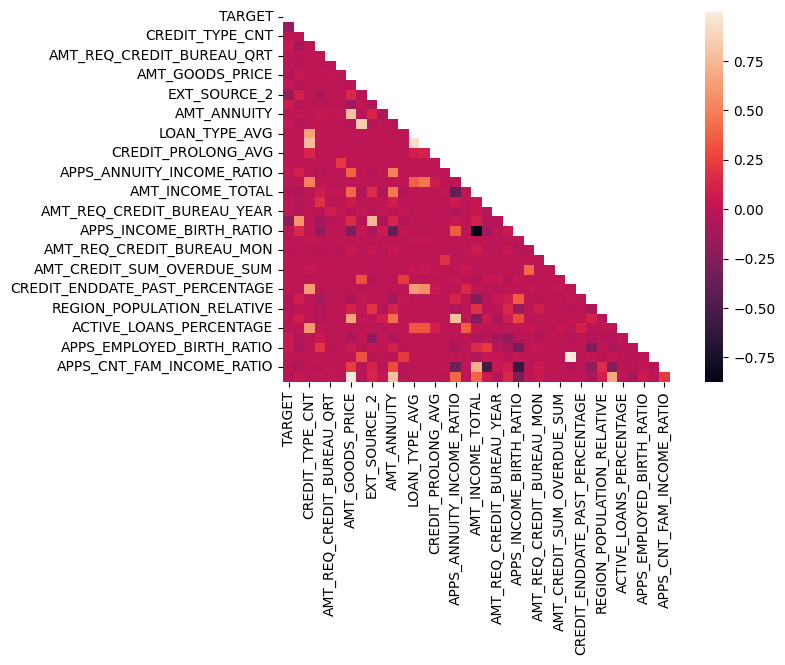

In [79]:
corr_matrix = app_train_orig_wide_norm[heat_map_columns].corr(numeric_only = True, method='pearson')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,mask=mask)

<Axes: >

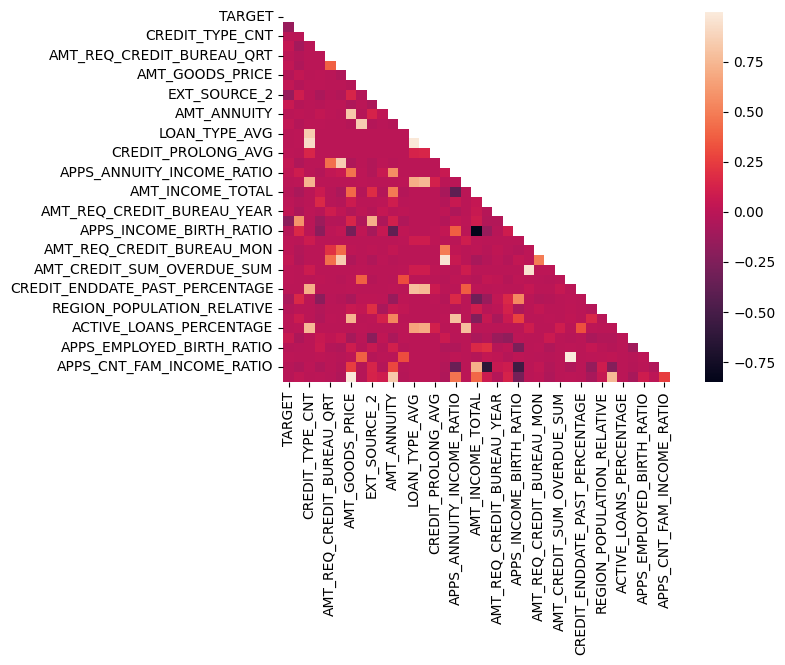

In [80]:
corr_matrix = app_train_orig_wide_norm[heat_map_columns].corr(numeric_only = True, method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,mask=mask)

In [81]:
def strong_correlations(df, threshold=0.8, method='pearson'):
    """
    Finds and returns the strongest pairwise correlations in a dataframe exceeding the given threshold.
    
    Parameters:
        df (pd.DataFrame): Input dataframe with numerical values.
        threshold (float): Minimum absolute correlation value to be included in the output.
    
    Returns:
        pd.DataFrame: A dataframe listing strongly correlated pairs.
    """
    corr_matrix = df.corr(method=method)  # Compute correlation matrix
    corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Keep only upper triangle to avoid duplicates
    strong_pairs = corr_matrix.stack().reset_index()  # Convert to long format
    strong_pairs.columns = ["Feature_1", "Feature_2", "Correlation"]
    
    return strong_pairs[abs(strong_pairs["Correlation"]) > threshold].sort_values(by="Correlation", ascending=False)


In [82]:
import pandas as pd

def feature_correlations(df, feature,method='pearson'):
    """
    Returns all correlations with the given feature, sorted in descending order.

    Parameters:
        df (pd.DataFrame): Input dataframe with numerical values.
        feature (str): The column name for which correlations should be calculated.

    Returns:
        pd.Series: A sorted series of correlations with the given feature.
    """
    if feature not in df.columns:
        raise ValueError(f"Feature '{feature}' not found in dataframe.")
    
    correlations = df.corr(method=method)[feature].drop(feature)  # Compute correlations and remove self-correlation
    return correlations.abs().sort_values(ascending=False)  # Sort by absolute correlation

In [83]:
target_corr_pearson_df = feature_correlations(app_train_orig_wide_norm[heat_map_columns],'TARGET')
target_corr_pearson_df.head(7)

APPS_EXT_SOURCE_MEAN         0.221830
EXT_SOURCE_2                 0.160303
EXT_SOURCE_3                 0.157397
LTV                          0.070776
DAYS_LAST_PHONE_CHANGE       0.055242
APPS_EMPLOYED_BIRTH_RATIO    0.043083
DAYS_REGISTRATION            0.041979
Name: TARGET, dtype: float64

In [84]:
target_corr_spearman_df = feature_correlations(app_train_orig_wide_norm[heat_map_columns],'TARGET',method='spearman')
target_corr_spearman_df.head(7)

APPS_EXT_SOURCE_MEAN          0.204274
EXT_SOURCE_2                  0.147145
EXT_SOURCE_3                  0.144496
APPS_INCOME_EMPLOYED_RATIO    0.072005
LTV                           0.066782
DAYS_LAST_PHONE_CHANGE        0.053711
DAYS_REGISTRATION             0.040171
Name: TARGET, dtype: float64

Корреляция Пирсона измеряет выраженность линейной зависимости, 
корреляция Спирмана - любой монотонной зависимости (необязательно линейной)

Значения корреляций достаточно близки, наблюдается лишь слабая корреляция с целевой переменной
Самый значимый признак - внешний источник

In [85]:
strong_correlations_pearson_df = strong_correlations(app_train_orig_wide_norm[heat_map_columns],threshold=0.7)

strong_correlations_pearson_df = strong_correlations_pearson_df.merge(target_corr_spearman_df,left_on='Feature_1',right_index=True).rename(
    columns={'TARGET':'Feature1CorrTarget'}
)

strong_correlations_pearson_df = strong_correlations_pearson_df.merge(target_corr_spearman_df,left_on='Feature_2',right_index=True).rename(
    columns={'TARGET':'Feature2CorrTarget'}
)

strong_correlations_pearson_df

,Feature_1,Feature_2,Correlation,Feature1CorrTarget,Feature2CorrTarget
655,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998230,0.008803,0.008957
237,AMT_GOODS_PRICE,AMT_CREDIT,0.986532,0.031506,0.017534
378,LOAN_TYPE_AVG,SK_ID_BUREAU_CNT,0.925792,0.000492,0.000433
241,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.848613,0.030528,0.028790
210,AMT_GOODS_PRICE,AMT_ANNUITY,0.790253,0.031506,0.000073
351,AMT_ANNUITY,AMT_CREDIT,0.787323,0.000073,0.017534
486,APPS_ANNUITY_INCOME_RATIO,DTI,0.784581,0.018431,0.001804
83,CREDIT_TYPE_CNT,SK_ID_BUREAU_CNT,0.769242,0.000074,0.000433
280,EXT_SOURCE_2,APPS_EXT_SOURCE_MEAN,0.748195,0.147145,0.204274
530,AMT_INCOME_TOTAL,APPS_CNT_FAM_INCOME_RATIO,0.710347,0.018104,0.016596


In [86]:
heat_map_columns = target_col + float_cols
heat_map_columns_uncorr = heat_map_columns.copy()
heat_map_columns_uncorr.remove('OBS_60_CNT_SOCIAL_CIRCLE')
heat_map_columns_uncorr.remove('AMT_CREDIT')
heat_map_columns_uncorr.remove('AMT_ANNUITY')
heat_map_columns_uncorr.remove('DTI')
heat_map_columns_uncorr.remove('CREDIT_TYPE_CNT')
heat_map_columns_uncorr.remove('EXT_SOURCE_2')
heat_map_columns_uncorr.remove('DEF_60_CNT_SOCIAL_CIRCLE')
heat_map_columns_uncorr.remove('LOAN_TYPE_AVG')
heat_map_columns_uncorr.remove('AMT_INCOME_TOTAL')

In [87]:
strong_correlations_pearson_df = strong_correlations(app_train_orig_wide_norm[heat_map_columns_uncorr],threshold=0.65)

strong_correlations_pearson_df = strong_correlations_pearson_df.merge(target_corr_spearman_df,left_on='Feature_1',right_index=True).rename(
    columns={'TARGET':'Feature1CorrTarget'}
)

strong_correlations_pearson_df = strong_correlations_pearson_df.merge(target_corr_spearman_df,left_on='Feature_2',right_index=True).rename(
    columns={'TARGET':'Feature2CorrTarget'}
)

strong_correlations_pearson_df

,Feature_1,Feature_2,Correlation,Feature1CorrTarget,Feature2CorrTarget


<function triu at 0x0000020DF49CEAF0>

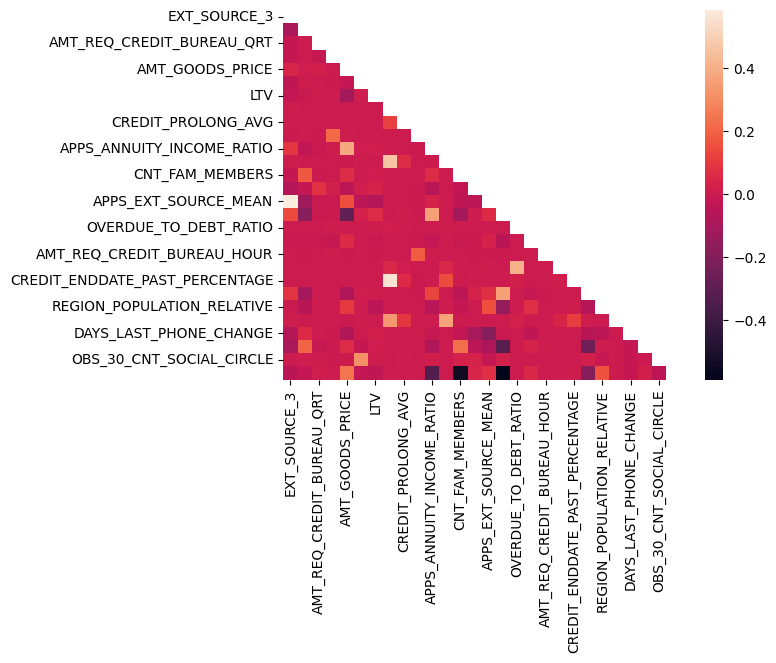

In [88]:
# Create a mask for the upper triangle (including diagonal)
heat_map_columns_uncorr_no_target = heat_map_columns_uncorr.copy()
heat_map_columns_uncorr_no_target.remove('TARGET')
corr_matrix = app_train_orig_wide_norm[heat_map_columns_uncorr_no_target].corr(numeric_only = True, method='pearson')

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask)
np.triu

In [89]:
len(heat_map_columns_uncorr_no_target)

28

осталось 28 признаков, не имеющих существенных линейных кореляций друг с другом. Их и будем использовать в моделировании

In [90]:
print(app_train_orig_wide_norm.shape)
float_cols_reduced = heat_map_columns_uncorr_no_target
float_columns_to_drop = list(set(float_cols)-set(float_cols_reduced))
app_train_orig_wide_norm_reduced = app_train_orig_wide_norm.drop(columns = float_columns_to_drop)
print(app_train_orig_wide_norm_reduced.shape)

(307511, 89)
(307511, 80)


## Нормализация и стандартизация

In [91]:
#### One Hote Encoding

from sklearn.preprocessing import OneHotEncoder

# Initialize encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Transform and create a new DataFrame
encoded_array = encoder.fit_transform(app_train_orig_wide_norm_reduced[object_cols])

# Get new column names
encoded_col_names = encoder.get_feature_names_out(object_cols)

# Drop original categorical columns from df
app_train_orig_wide_norm_reduced.drop(columns=object_cols, inplace=True)

# Add the encoded values as new columns
app_train_orig_wide_norm_reduced[encoded_col_names] = encoded_array

In [92]:
app_train_orig_wide_norm_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 116 entries, SK_ID_CURR to ORGANIZATION_TYPE_GRP_Transportation
dtypes: float64(80), int64(36)
memory usage: 272.2 MB


### MinMax or StandardScaler?

In [93]:
float_cols_reduced = heat_map_columns_uncorr_no_target

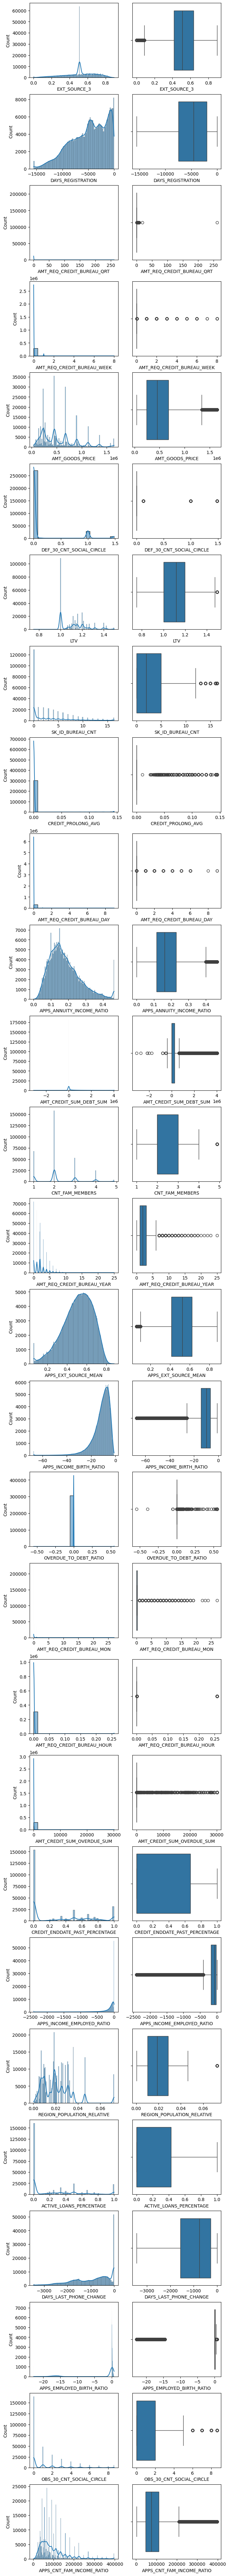

In [94]:
# Графики распределения переменных и "ящики с усами"
fig, axes = plt.subplots(28, 2, figsize=(7, 80),constrained_layout=True)
for k, column in enumerate(float_cols_reduced):    
    sns.histplot(data=app_train_orig_wide_norm_reduced, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=app_train_orig_wide_norm_reduced, x=column, ax=axes[k, 1])
# plt.tight_layout()
plt.show()

### Нормализация

In [95]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMscaler = MinMaxScaler()
StdScaler = StandardScaler()

std_list = ['APPS_INCOME_BIRTH_RATIO','APPS_INCOME_EMPLOYED_RATIO','DAYS_LAST_PHONE_CHANGE'
            ,'DAYS_REGISTRATION','APPS_CNT_FAM_INCOME_RATIO']
mm_list = list(set(float_cols_reduced)-set(std_list))

app_train_orig_wide_norm_reduced[mm_list] = MMscaler.fit_transform(app_train_orig_wide_norm_reduced[mm_list])
app_train_orig_wide_norm_reduced[std_list] = StdScaler.fit_transform(app_train_orig_wide_norm_reduced[std_list])


### Сохранить расширенный датасет на диск

In [96]:
app_train_orig_wide_norm_reduced.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'ORGANIZATION_TYPE_GRP_Energy & Utilities',
       'ORGANIZATION_TYPE_GRP_Finance & Business',
       'ORGANIZATION_TYPE_GRP_Healthcare',
       'ORGANIZATION_TYPE_GRP_Hospitality & Leisure',
       'ORGANIZATION_TYPE_GRP_Industry & Manufacturing',
       'ORGANIZATION_TYPE_GRP_Other / Unknown',
       'ORGANIZATION_TYPE_GRP_Public Services',
       'ORGANIZATION_TYPE_GRP_Self-Employment & Services',
       'ORGANIZATION_TYPE_GRP_Trade & Retail',
       'ORGANIZATION_TYPE_GRP_Transportation'],
      dtype='object', length=116)

In [97]:
app_train_orig_wide_norm_reduced.to_csv('app_train_orig_wide_norm_reduced.csv',index=True)

float_cols = app_train_orig_wide_norm_reduced.columns[app_train_orig_wide_norm_reduced.dtypes == 'float64'].tolist()
int_cols = app_train_orig_wide_norm_reduced.columns[app_train_orig_wide_norm_reduced.dtypes == 'int64'].tolist()

pd.DataFrame(float_cols, columns=['Values']).to_csv('float_cols.csv', index=False)
pd.DataFrame(int_cols, columns=['Values']).to_csv('int_cols.csv', index=False)

## Классификаторы

### Подгрузка библиотек

In [98]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score,recall_score

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [101]:
# Разбиваем датасет на train/test
X = app_train_orig_wide_norm_reduced.drop(columns=['TARGET','SK_ID_CURR']).copy()
y = app_train_orig_wide_norm_reduced['TARGET'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3,random_state=2025)

### Дерево решений

In [102]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

# Get Predicted Probabilities for the Positive Class
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred = model.predict(X_test)

# Compute AUC-ROC Score
auc_roc = roc_auc_score(y_test, y_pred_proba)
accuracy_sc = accuracy_score(y_test, y_pred)
precision_sc = precision_score(y_test,y_pred)
recall_sc = recall_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)

print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"accuracy score: {accuracy_sc:.4f}")
print(f"precision score: {precision_sc:.4f}")
print(f"recall score: {recall_sc:.4f}")
print(f"{conf_matrix}")

AUC-ROC Score: 0.6953
accuracy score: 0.9197
precision score: 0.0000
recall score: 0.0000
[[84846     0]
 [ 7408     0]]


In [115]:
model = DecisionTreeClassifier(max_depth=5)
# help(model.fit)

In [104]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

# Get Predicted Probabilities for the Positive Class
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred = model.predict(X_test)

# Compute AUC-ROC Score
auc_roc = roc_auc_score(y_test, y_pred_proba)
accuracy_sc = accuracy_score(y_test, y_pred)
precision_sc = precision_score(y_test,y_pred)
recall_sc = recall_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)

print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"accuracy score: {accuracy_sc:.4f}")
print(f"precision score: {precision_sc:.4f}")
print(f"recall score: {recall_sc:.4f}")
print(f"{conf_matrix}")

AUC-ROC Score: 0.7214
accuracy score: 0.9195
precision score: 0.4386
recall score: 0.0101
[[84750    96]
 [ 7333    75]]


In [105]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

# Get Predicted Probabilities for the Positive Class
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred = model.predict(X_test)

# Compute AUC-ROC Score
auc_roc = roc_auc_score(y_test, y_pred_proba)
accuracy_sc = accuracy_score(y_test, y_pred)
precision_sc = precision_score(y_test,y_pred)
recall_sc = recall_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)

print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"accuracy score: {accuracy_sc:.4f}")
print(f"precision score: {precision_sc:.4f}")
print(f"recall score: {recall_sc:.4f}")
print(f"{conf_matrix}")

AUC-ROC Score: 0.7157
accuracy score: 0.9164
precision score: 0.2845
recall score: 0.0270
[[84343   503]
 [ 7208   200]]


### К-средних

In [106]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Get Predicted Probabilities for the Positive Class
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred = model.predict(X_test)

# Compute AUC-ROC Score
auc_roc = roc_auc_score(y_test, y_pred_proba)
accuracy_sc = accuracy_score(y_test, y_pred)
precision_sc = precision_score(y_test,y_pred)
recall_sc = recall_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)

print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"accuracy score: {accuracy_sc:.4f}")
print(f"precision score: {precision_sc:.4f}")
print(f"recall score: {recall_sc:.4f}")
print(f"{conf_matrix}")

AUC-ROC Score: 0.5262
accuracy score: 0.9145
precision score: 0.1073
recall score: 0.0089
[[84297   549]
 [ 7342    66]]


### SVM classifier

In [107]:
# model = SVC()
# model.fit(X_train, y_train)

# # Get Predicted Probabilities for the Positive Class
# y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
# y_pred = model.predict(X_test)

# # Compute AUC-ROC Score
# auc_roc = roc_auc_score(y_test, y_pred_proba)
# accuracy_sc = accuracy_score(y_test, y_pred)
# precision_sc = precision_score(y_test,y_pred)
# recall_sc = recall_score(y_test,y_pred)
# conf_matrix = confusion_matrix(y_test,y_pred)

# print(f"AUC-ROC Score: {auc_roc:.4f}")
# print(f"accuracy score: {accuracy_sc:.4f}")
# print(f"precision score: {precision_sc:.4f}")
# print(f"recall score: {recall_sc:.4f}")
# print(f"{conf_matrix}")

### Логистическая регрессия

In [108]:
# model = LogisticRegression(max_iter=500,class_weight="balanced",penalty="l1",solver="liblinear",C=1)
# model.fit(X_train, y_train)

# # Get Predicted Probabilities for the Positive Class
# y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
# y_pred = model.predict(X_test)

# # Compute AUC-ROC Score
# auc_roc = roc_auc_score(y_test, y_pred_proba)
# accuracy_sc = accuracy_score(y_test, y_pred)
# precision_sc = precision_score(y_test,y_pred)
# recall_sc = recall_score(y_test,y_pred)
# conf_matrix = confusion_matrix(y_test,y_pred)

# print(f"AUC-ROC Score: {auc_roc:.4f}")
# print(f"accuracy score: {accuracy_sc:.4f}")
# print(f"precision score: {precision_sc:.4f}")
# print(f"recall score: {recall_sc:.4f}")
# print(f"{conf_matrix}")

In [109]:
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

# # Get Predicted Probabilities for the Positive Class
# y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
# y_pred = model.predict(X_test)

# # Compute AUC-ROC Score
# auc_roc = roc_auc_score(y_test, y_pred_proba)
# accuracy_sc = accuracy_score(y_test, y_pred)
# precision_sc = precision_score(y_test,y_pred)
# recall_sc = recall_score(y_test,y_pred)
# conf_matrix = confusion_matrix(y_test,y_pred)

# print(f"AUC-ROC Score: {auc_roc:.4f}")
# print(f"accuracy score: {accuracy_sc:.4f}")
# print(f"precision score: {precision_sc:.4f}")
# print(f"recall score: {recall_sc:.4f}")
# print(f"{conf_matrix}")

In [110]:
# model = LogisticRegression(max_iter=500,class_weight="balanced")
# # Определение параметров для подбора
# param_grid = {
#     "C": [0.01, 0.1, 1, 10],  # Regularization strength
#     # "penalty": ["l1", "l2"],  # Type of regularization
#     "penalty": ["l1"],  # Type of regularization
#     "solver": ["liblinear"]  # Supports both l1 and l2 penalty
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring="f1", n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the best score
# print("Best parameters:", grid_search.best_params_)
# print("Best F1-score:", grid_search.best_score_)

In [111]:
# feats = ['index', 'POS_SK_DPD_DEF_SUM', 'CC_DRAWING_LIMIT_RATIO_MAX', 'INSTAL_PAYMENT_RATIO_MEAN', 'POS_REMAINING_INSTALMENTS', 'CC_LAST_AMT_BALANCE_MEAN', 'CC_PAYMENT_DIV_MIN_MIN', 'CC_LATE_PAYMENT_VAR', 'NEW_DOC_KURT', 'PREV_SK_ID_PREV_NUNIQUE', 'EMERGENCYSTATE_MODE_nan', 'REFUSED_AMT_GOODS_PRICE_MAX', 'ORGANIZATION_TYPE_Industry_type_5', 'CC_AMT_PAYMENT_TOTAL_CURRENT_SUM', 'CC_CNT_DRAWINGS_POS_CURRENT_SUM', 'APPROVED_AMT_GOODS_PRICE_MAX', 'PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN', 'APPROVED_AMT_ANNUITY_MAX', 'BURO_CREDIT_ACTIVE_Active_MEAN', 'PREV_NAME_PRODUCT_TYPE_walk_in_MEAN', 'BURO_AMT_CREDIT_SUM_MAX', 'CC_CNT_DRAWINGS_ATM_CURRENT_SUM', 'ACTIVE_DAYS_CREDIT_VAR', 'ACTIVE_MONTHS_BALANCE_MAX_MAX', 'NAME_EDUCATION_TYPE_Higher_education', 'CC_CNT_DRAWINGS_POS_CURRENT_VAR', 'PREV_APP_CREDIT_PERC_MIN', 'REGION_RATING_CLIENT_W_CITY', 'NAME_HOUSING_TYPE_House_apartment', 'CLOSED_AMT_CREDIT_SUM_DEBT_SUM', 'APPROVED_DAYS_DECISION_MEAN', 'ANNUITY_INCOME_PERC', 'ORGANIZATION_TYPE_Services', 'FLAG_DOCUMENT_8', 'WALLSMATERIAL_MODE_Panel', 'ORGANIZATION_TYPE_Cleaning', 'ORGANIZATION_TYPE_Military', 'LIVINGAPARTMENTS_AVG', 'APARTMENTS_AVG', 'ELEVATORS_AVG', 'ORGANIZATION_TYPE_School', 'INSTAL_DPD_MEAN', 'FLOORSMIN_AVG', 'INSTAL_DBD_SUM', 'DAYS_BIRTH', 'INSTAL_DPD_MAX', 'ACTIVE_AMT_CREDIT_SUM_DEBT_MAX', 'OCCUPATION_TYPE_High_skill_tech_staff', 'CC_AMT_DRAWINGS_ATM_CURRENT_VAR', 'ACTIVE_DAYS_CREDIT_ENDDATE_MEAN', 'CC_CNT_DRAWINGS_ATM_CURRENT_MIN', 'PREV_NAME_TYPE_SUITE_Spouse_partner_MEAN', 'CC_AMT_DRAWINGS_OTHER_CURRENT_MEAN', 'POS_SK_DPD_DEF_MEAN', 'ACTIVE_DAYS_CREDIT_ENDDATE_MIN', 'PREV_AMT_DOWN_PAYMENT_MAX', 'BURO_AMT_CREDIT_SUM_SUM', 'PREV_NAME_TYPE_SUITE_Group_of_people_MEAN', 'PREV_APP_CREDIT_PERC_MEAN', 'INSTAL_AMT_PAYMENT_MEAN', 'ACTIVE_DAYS_CREDIT_UPDATE_MEAN', 'INSTAL_DAYS_ENTRY_PAYMENT_MAX', 'PREV_NAME_TYPE_SUITE_Unaccompanied_MEAN', 'CC_CNT_DRAWINGS_POS_CURRENT_MIN', 'ACTIVE_AMT_CREDIT_SUM_MEAN', 'OCCUPATION_TYPE_Private_service_staff', 'CC_CNT_DRAWINGS_OTHER_CURRENT_MEAN', 'BURO_AMT_CREDIT_SUM_MEAN', 'CC_AMT_DRAWINGS_OTHER_CURRENT_MIN', 'CC_AMT_DRAWINGS_OTHER_CURRENT_SUM', 'INSTAL_AMT_PAYMENT_SUM', 'PREV_NAME_PRODUCT_TYPE_nan_MEAN', 'CC_CNT_DRAWINGS_ATM_CURRENT_MEAN', 'OCCUPATION_TYPE_HR_staff', 'BURO_AMT_CREDIT_SUM_OVERDUE_MEAN', 'PREV_CODE_REJECT_REASON_LIMIT_MEAN', 'CC_AMT_DRAWINGS_POS_CURRENT_MIN', 'BURO_AMT_CREDIT_MAX_OVERDUE_MEAN', 'FLOORSMAX_MODE', 'ELEVATORS_MEDI', 'CODE_GENDER', 'INSTAL_DBD_MEAN', 'ORGANIZATION_TYPE_Advertising', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_20', 'OCCUPATION_TYPE_Managers', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE_Yes', 'POS_COUNT', 'LIVINGAREA_MODE', 'YEARS_BUILD_MEDI', 'AMT_CREDIT', 'INCOME_PER_PERSON', 'EMERGENCYSTATE_MODE_No', 'ORGANIZATION_TYPE_Police', 'FLAG_WORK_PHONE', 'LANDAREA_MEDI', 'COMMONAREA_AVG', 'ORGANIZATION_TYPE_University', 'ORGANIZATION_TYPE_Medicine', 'ORGANIZATION_TYPE_Telecom', 'NONLIVINGAPARTMENTS_AVG', 'WALLSMATERIAL_MODE_Block', 'ORGANIZATION_TYPE_Housing', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'WALLSMATERIAL_MODE_Monolithic', 'REGION_POPULATION_RELATIVE', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLOORSMAX_MEDI', 'ORGANIZATION_TYPE_Electricity', 'REGION_RATING_CLIENT', 'YEARS_BUILD_MODE', 'DAYS_ID_PUBLISH', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE_Mixed', 'EXT_SOURCE_1', 'FLAG_DOCUMENT_16', 'YEARS_BEGINEXPLUATATION_MODE', 'INSTAL_COUNT', 'ORGANIZATION_TYPE_Realtor', 'FLAG_DOCUMENT_6', 'COMMONAREA_MODE', 'FLAG_DOCUMENT_3', 'FLOORSMAX_AVG', 'OCCUPATION_TYPE_Laborers', 'APARTMENTS_MODE', 'ORGANIZATION_TYPE_Security', 'AMT_INCOME_TOTAL', 'ENTRANCES_AVG', 'PAYMENT_RATE', 'FLAG_DOCUMENT_17', 'FLAG_OWN_CAR', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'FLAG_DOCUMENT_19', 'ORGANIZATION_TYPE_Mobile', 'INSTAL_DBD_MAX', 'LANDAREA_MODE', 'DAYS_EMPLOYED_PERC', 'INCOME_CREDIT_PERC', 'LIVINGAREA_AVG', 'ORGANIZATION_TYPE_Postal', 'BASEMENTAREA_AVG', 'ORGANIZATION_TYPE_Insurance', 'OCCUPATION_TYPE_Accountants', 'BURO_CREDIT_TYPE_Microloan_MEAN', 'NONLIVINGAREA_MEDI', 'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE', 'FONDKAPREMONT_MODE_nan', 'INS_24M_AMT_BALANCE_MAX', 'ORGANIZATION_TYPE_Agriculture', 'CC_AMT_PAYMENT_TOTAL_CURRENT_MIN', 'CC_CNT_DRAWINGS_OTHER_CURRENT_SUM', 'PREV_NAME_TYPE_SUITE_Other_B_MEAN', 'CC_AMT_DRAWINGS_ATM_CURRENT_MIN', 'CC_NAME_CONTRACT_STATUS_Sent_proposal_MIN', 'NONLIVINGAREA_AVG', 'FLAG_DOCUMENT_11', 'CC_CNT_DRAWINGS_CURRENT_MIN', 'EXT_SOURCE_2', 'NONLIVINGAREA_MODE', 'AMT_ANNUITY', 'BURO_CREDIT_TYPE_Mortgage_MEAN', 'AMT_GOODS_PRICE', 'APPROVED_CNT_PAYMENT_MEAN', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_18', 'NONLIVINGAPARTMENTS_MEDI', 'ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN', 'ORGANIZATION_TYPE_Construction', 'INSTAL_AMT_PAYMENT_MIN', 'BURO_AMT_CREDIT_SUM_DEBT_MEAN']

In [112]:
# feats_df = pd.DataFrame(feats, columns=['feature_names'])

In [113]:
# feats_df.to_csv('micro_model_features.csv', index=False)

In [114]:
# feats_df.head(5)